# Assignment 8
## Submitted by - Akarsh Sahu

In [2]:

import numpy as np 
import pandas as pd 
import os
from keras.utils import to_categorical
from keras import layers
from keras import models, Sequential
from keras.layers import Conv2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import load_img
from keras import optimizers, regularizers
from keras.optimizers import SGD
import os, glob
import numpy as np
from keras.models import model_from_yaml
from keras.preprocessing import image

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
#!pip install -U PyYaml==5.1.2
#!pip install -U keras

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dr_path = "drive/My Drive/ML Assignment 8/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Data Processing:

The train & test data is pretty clean in terms of image data, but we will need to do a bit of prep work to use in our model.

a) Use the "ImageDataGenerator()" class from keras.processing.image to build out an instance called "train_datagen" with the following parameters:

- rescale = 1./255
- shear_range = 0.2
- zoom_range = 0.2
- horizontal_flip = True

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

b) Then build your training set by using the method ".flow_from_directory()"

- path (where training data is stored)
- target_size = (64, 64)
- batch_size = 32
- class_mode = categorical

In [0]:
train_set = train_datagen.flow_from_directory(
    dr_path + "dataset_train",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 88 images belonging to 4 classes.


c) Take a look at your training set: 

- What is the image shape of each training observation?
- How many total classes do we need to predict on? 

In [0]:
img_shape = train_set.image_shape
img_shape

(64, 64, 3)

In [0]:
train_set.class_indices

{'category 1': 0, 'category 2': 1, 'category 3': 2, 'category 4': 3}

## 2. Initial Classifier Build:


Now use keras to build an initial image classifier with the following specifications.

*Note: If you get lost, there is great documentation online and homework 7 included details on many of the layers used here.*

* Create an instance of Sequential called "classifier"
* Add a Conv2D layer with the following parameters: 
    1. filters = 32
    2. kernel_size = (3,3)
    3. input_shape = image shape found in part 1
    4. activation = relu
* Add a MaxPooling2D layer where pool_size = (2,2)
* Add another Conv2D layer: 
    1. filters = 64
    2. kernel_size = (3,3)
    3. activation = relu
* Add a MaxPooling2D layer where pool_size = (2,2)
* Add a Flatten layer
* Add a Dense layer
    1. units = 128
    2. activation = relu
* Add a final Dense layer (this will output our probabilities):
    1. units = # of classes
    2. activation = softmax 
* Compile with the following: 
    1. optimize = adam
    2. loss = categorical cross entropy
    3. metric = accuracy






In [0]:
def create_model():
  classifier = Sequential()
  classifier.add(layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = img_shape))
  classifier.add(layers.MaxPooling2D(pool_size = (2,2)))
  classifier.add(layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
  classifier.add(layers.MaxPooling2D(pool_size = (2,2)))
  classifier.add(layers.Flatten())
  classifier.add(layers.Dense(128, activation  = 'relu'))
  classifier.add(layers.Dense(4, activation = 'softmax'))

  classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return classifier



In [0]:
classifier = create_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

## 3. Model Runs:

a) Use .fit_generator() with the training set. For the first run, use the following parameters: 

- steps_per_epoch = 10
- epochs = 10

In [0]:
model_1 = classifier.fit_generator(train_set, steps_per_epoch=10, epochs = 10)


Epoch 1/10
10/10 [==============================] - 4s 400ms/step - loss: 1.1047 - accuracy: 0.5903
Epoch 2/10
10/10 [==============================] - 3s 268ms/step - loss: 0.2357 - accuracy: 0.9426
Epoch 3/10
10/10 [==============================] - 3s 265ms/step - loss: 0.1339 - accuracy: 0.9493
Epoch 4/10
10/10 [==============================] - 3s 273ms/step - loss: 0.0916 - accuracy: 0.9696
Epoch 5/10
10/10 [==============================] - 3s 268ms/step - loss: 0.0296 - accuracy: 0.9932
Epoch 6/10
10/10 [==============================] - 3s 261ms/step - loss: 0.0257 - accuracy: 0.9931
Epoch 7/10
10/10 [==============================] - 3s 271ms/step - loss: 0.0113 - accuracy: 0.9966
Epoch 8/10
10/10 [==============================] - 3s 263ms/step - loss: 0.0087 - accuracy: 0.9965
Epoch 9/10
10/10 [==============================] - 3s 265ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 3s 267ms/step - loss: 0.0061 - accuracy: 0.996

b) Write out each model & model_weights to a file.

In [0]:
# write model and model weights to disk
model_yaml = classifier.to_yaml()
with open("model_1.yaml", "w") as yaml_file:
  yaml_file.write(model_yaml)
  
  classifier.save_weights(dr_path + "models/" + "model_1.h5")
print("Saved model to disk")

Saved model to disk


c) Predict using the model built in step 2. An example below shows how to reread weights & model: 

In [0]:
# load model from disk
yaml_file = open('model_1.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)
# load weights into new model
model.load_weights(dr_path + "models/" + "model_1.h5")
print("Loaded model from disk")

# test data path
img_dir = dr_path + "dataset_test" # Enter Directory of all images

# iterate over each test image
# make a prediction and add to results 
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
data = []
results = []
for f1 in files:
    img = image.load_img(f1, target_size = (64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    data.append(img)
    result = model.predict(img)
    r = np.argmax(result, axis=1)
    results.append(r)

np.concatenate(results).ravel()

Loaded model from disk


array([0, 2, 3, 0, 1, 1, 1, 3])

d) Determine accuracy.

*Note: To determine accuracy, you will need to manually check the labels given to each class in the training data. This will require you to go and look in the training data, and then determine how a category was coded in keras.*

1. Category 0 - Pant Shape
2. Category 1 - Gift Wrap
3. Category 2 - Mask - Darth Vader
4. Category 3 - Cross

By Looking at the results manually, the accuracy = 0.75

e) Run this process for the following combinations:

* (steps_per_epoch: 10, epochs: 10) <- the one we just did 
* (steps_per_epoch: 10, epochs: 20)
* (steps_per_epoch: 10, epochs: 30)
* (steps_per_epoch: 30, epochs: 10)
* (steps_per_epoch: 30, epochs: 20)
* (steps_per_epoch: 30, epochs: 30)
* (steps_per_epoch: 50, epochs: 10)
* (steps_per_epoch: 50, epochs: 20)
* (steps_per_epoch: 50, epochs: 30)
* (steps_per_epoch: 50, epochs: 100)

In [0]:
steps_iter = np.arange(10, 60, 20)
epochs_iter = np.array([10,20,30,100])

#steps_iter = np.arange(10, 20, 10)
#epochs_iter = np.array([10,20])

iter = 1
final_result = []

for steps in steps_iter:
  for epochs in epochs_iter:
    model = classifier.fit_generator(train_set, steps_per_epoch=steps, epochs = epochs)

    # write model and model weights to disk
    model_yaml = classifier.to_yaml()
    with open("model.yaml", "w") as yaml_file:
      yaml_file.write(model_yaml)



      classifier.save_weights(dr_path + "models/" + "model_" + str(iter) + ".h5")
    print("Saved model {} to disk - Steps - {}, Epochs - {}".format(1, steps, epochs))
    
    # Prediction

    # load model from disk
    yaml_file = open('model.yaml', 'r')
    loaded_model_yaml = yaml_file.read()
    yaml_file.close()
    model = model_from_yaml(loaded_model_yaml)
    print(iter)
    # load weights into new model
    model.load_weights(dr_path + "models/" + "model_" + str(iter) + ".h5")
    print("Loaded model {} from disk".format(iter))

    # test data path
    img_dir = dr_path + "dataset_test" # Enter Directory of all images

    # iterate over each test image
    # make a prediction and add to results 
    data_path = os.path.join(img_dir, '*g')
    files = glob.glob(data_path)
    data = []
    results = []
    for f1 in files:
        img = image.load_img(f1, target_size = (64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        data.append(img)
        result = model.predict(img)
        r = np.argmax(result, axis=1)
        results.append(r)
    final_result.append(results)

    iter = iter + 1

Epoch 1/10
10/10 [==============================] - 3s 262ms/step - loss: 3.4788e-05 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 3s 276ms/step - loss: 1.8721e-05 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 259ms/step - loss: 1.4536e-05 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 3s 267ms/step - loss: 1.4732e-05 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 3s 267ms/step - loss: 1.3993e-05 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 3s 265ms/step - loss: 1.6242e-05 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 3s 274ms/step - loss: 6.3255e-06 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 3s 269ms/step - loss: 1.7786e-05 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 3s 259ms/step - loss: 1.2133e-05 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 3s 273ms/st

In [0]:
## Save Final Results on Drive
final_result_1 = pd.DataFrame(final_result)
final_result_1.to_csv(dr_path + "test_result.csv")

f) Create a final dataframe that combines the accuracy across each combination.

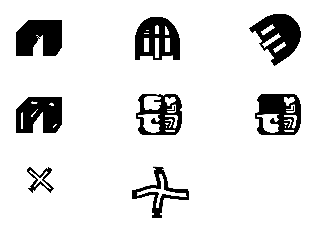

In [35]:
import matplotlib.pyplot as plt
img_dir = dr_path + "dataset_test" 
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
files

import cv2
def read_image(path):
  image = cv2.imread(path, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

for x in range(8):
  plt.subplot(3, 3, x+1)
  image = read_image(files[x])
  plt.imshow(image)
  plt.axis('off')
plt.show()

1. Category 0 - Pant Shape
2. Category 1 - Gift Wrap
3. Category 2 - Mask - Darth Vader
4. Category 3 - Cross

Looking at the test images, here are the true/actual categories:

* Test_1 - Category 0
* Test_2 - Category 2
* Test_3 - Category 2
* Test_4 - Category 0
* Test_5 - Category 1
* Test_6 - Category 1
* Test_7 - Category 3
* Test_8 - Category 3

In [48]:
## Final Output Table
test_result = pd.read_csv(dr_path + "test_result.csv")
colname = ['Test_'+ str(x) for x in num]
colname.insert(0, "Model")
test_result.columns = colname

test_result.insert(1,"Steps_Per_Epoch" ,[10, 10, 10, 10, 30, 30, 30, 30, 50, 50, 50, 50])
test_result.insert(2,"Epochs" ,[10, 20, 30, 100, 10, 20, 30, 100,10, 20, 30, 100])

test_result.insert(len(test_result.columns), "Accuracy", [0.75]*12)
test_result

,Model,Steps_Per_Epoch,Epochs,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Accuracy
0,0,10,10,[0],[2],[3],[0],[1],[1],[1],[3],0.75
1,1,10,20,[0],[2],[3],[0],[1],[1],[1],[3],0.75
2,2,10,30,[0],[2],[3],[0],[1],[1],[1],[3],0.75
3,3,10,100,[0],[2],[3],[0],[1],[1],[1],[3],0.75
4,4,30,10,[0],[2],[3],[0],[1],[1],[1],[3],0.75
5,5,30,20,[0],[2],[3],[0],[1],[1],[1],[3],0.75
6,6,30,30,[0],[2],[3],[0],[1],[1],[1],[3],0.75
7,7,30,100,[0],[2],[3],[0],[1],[1],[1],[3],0.75
8,8,50,10,[0],[2],[3],[0],[1],[1],[1],[3],0.75
9,9,50,20,[0],[2],[3],[0],[1],[1],[1],[3],0.75


## Conceptual Questions: 

#### 4. Discuss the effect of the following on accuracy and loss (train & test): 

* Increasing the steps_per_epoch
* Increasing the number of epochs

* Increasing the steps_per_epoch
  - Higher steps_per_epoch --> Higher Accuracy in train and test set

* Increasing the number of epochs
  - Higher number of epochs --> Higher Accuracy in train but lower accuracy in test set

#### 5. Name two uses of zero padding in CNN.

Zero-padding refers to the process of symmetrically adding zeroes to the input matrix. It’s a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume.

It is a generic way to 
1. Control the shrinkage of dimension after applying filters larger than 1x1, and 
2. Avoid loosing information at the boundaries, e.g. when weights in a filter drop rapidly away from its center.

#### 6. What is the use of a 1 x 1 kernel in CNN? 

A 1x1 convolution can increase or decrease the number of effective kernels by doing a weighted sum of responses in a depth column at any location on the feature map. A depth column is a set of feature responses at the same position but on different feature maps. That is, at any given position of the input feature map, a depth column is a response vector of different kernels.

The 1x1 conv thus samples a depth column at each location on the feature map and does a weighted sum of that vector, with some non-linearity, to produce a new set of responses at that location. Given that a depth column is of dimensionality d and the new set of responses of dimensionality k then if k>d then we have dimensionality increase otherwise we have dimensionality reduction.

For example, if we have 10 3x3 kernels convolving over an input feature map, the output from such a layer would be of depth 10 and a 1x1 convolution operation on the output from such a layer will only sample depth-wise which means it gets a depth column of dimensionality 10 at each location. And suppose the 1x1 conv has, say, 20 nodes each doing a weighted sum of those 10 responses at each location. That is equivalent to doing 20 3x3 convolutions but in a much more efficient manner. This enables artificially increasing/reducing the number of kernels.

A good example of what a 1x1 conv does is in steerable filters. Consider a Sobel kernel which has two kernels, the x-kernel and the y-kernel, meaning that the output has depth of 2, one for each kernel response. We can artificially increase the kernels by steering[1], that is, at each location we can sample a depth column of size 2 and do a weighted sum to produce say, 16 orientated kernels from just 2 basis kernels. We can also reduce the kernel count if, to start with, we had a large number of kernels using the same approach.

Thus a 1x1 convolution does a linear combination of kernels to produce either a larger/smaller number of equivalent kernels.

#### 7. What are the advantages of a CNN over a fully connected DNN for this image classification problem?

Convolutional Neural Networks are the basis of all modern computer vision models. Fully connected networks do not scale up past toy problems, because they use far too many parameters. CNNs are a much less flexible model compared to a fully connected network, and are biased toward performing well on image, because in images we would like to extract location invariant features.

A face is a face no matter where it is located in an image. This is obvious to us, but a fully connected network must learn this property. CNNs encode this property, which is that we would like to extract the same features in an image, regardless of the where they are located. This means that we can learn the same feature extractor (the convolution) for every location in an image, which is a massive savings in parameters over a fully connected network, which would have to relearn the same feature extractor for each location.

CNNs are also useful for 1D problems like time series, and 3D image classification, because they have the same structure where we would like location invariant features. Convolutions are technically location equivariant because they preserve the location of extracted features, but the important thing is that the same features are extracted over the entire image.